# Conclusiones

Tenemos imágenes S2 con tamaños de 500 x 500 px en data/BANDS. Estas imágenes tienen 12 bandas (podemos usarlas todas, solo RGB o alguna otra combinación que sea más adecuada para la tarea). Además, tenemos una serie temporal de imágenes (que varía entre 19 y 48 time steps).

El target es una máscara binara en mask_timeless/CULTIVATED con tamaño 2000 x 2000 px. 

Tenemos datos extra que se podrían llegar a usar como nubes, mapa de clasificación, ...

In [3]:
import os 

path = 'data/eopatches/train'
patches = os.listdir(path)
len(patches)

100

In [61]:
from tqdm import tqdm 
import gzip 
import numpy as np

def get_npy(patch, name='data/BANDS'):
    file_path = f'{path}/{patch}/{name}.npy.gz'
    f = gzip.GzipFile(file_path, "r")
    return np.load(f)

def get_shape(patch):
    bands = get_npy(patch)
    return bands.shape

In [59]:
import concurrent.futures

with concurrent.futures.ThreadPoolExecutor() as executor:
    shapes = list(executor.map(get_shape, patches))

In [60]:
unique_shapes = set(shapes)
unique_shapes

{(19, 500, 500, 12),
 (22, 500, 500, 12),
 (24, 500, 500, 12),
 (25, 500, 500, 12),
 (38, 500, 500, 12),
 (44, 500, 500, 12),
 (45, 500, 500, 12),
 (46, 500, 500, 12),
 (48, 500, 500, 12)}

In [45]:
sample = patches[10]
os.listdir(f'{path}/{sample}')

['meta_info.pkl.gz',
 'data',
 'mask',
 'mask_timeless',
 'timestamp.pkl.gz',
 'scalar',
 'vector_timeless',
 'bbox.pkl.gz']

In [48]:
bands = get_bands(sample)

bands.shape, bands.dtype

((38, 500, 500, 12), dtype('uint16'))

In [100]:
def get_rgb(bands, step=0):
    return bands[...,[3,2,1]][step]

rgb = get_rgb(bands)

rgb.shape, rgb.dtype, rgb.max(), rgb.min()

((500, 500, 3), dtype('uint16'), 4848, 289)

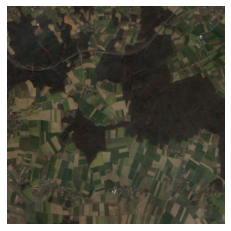

In [101]:
import matplotlib.pyplot as plt

def norm_rgb(rgb, max_value=4000):
    return (rgb / max_value).clip(0, 1).astype(float)

plt.imshow(norm_rgb(rgb))
plt.axis('off')
plt.show()

In [73]:
# probabilidad de nube en cada pixel

clp = get_npy(sample, 'data/CLP')

clp.shape, clp.dtype, clp.max(), clp.min()

((38, 500, 500, 1), dtype('uint8'), 255, 0)

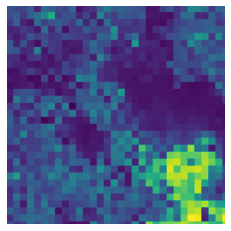

In [74]:
plt.imshow(clp[0])
plt.axis('off')
plt.show()

In [75]:
# probabilidad de nube en cada pixel

clm = get_npy(sample, 'mask/CLM')

clm.shape, clm.dtype, clm.max(), clm.min()

((38, 500, 500, 1), dtype('uint8'), 1, 0)

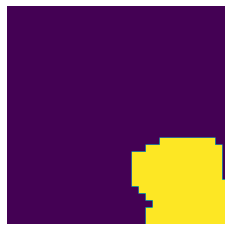

In [76]:
# máscara de nubes (binario)

plt.imshow(clm[0])
plt.axis('off')
plt.show()

In [78]:
# binary mask denoting data/no-data pixels;

is_data = get_npy(sample, 'mask/IS_DATA')

is_data.shape, is_data.dtype, is_data.max(), is_data.min()

((38, 500, 500, 1), dtype('bool'), True, True)

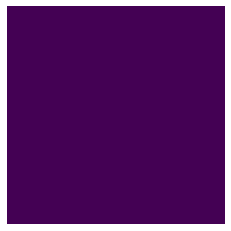

In [80]:
plt.imshow(is_data[0])
plt.axis('off')
plt.show()

In [81]:
# scene classification mask

scl = get_npy(sample, 'mask/SCL')

scl.shape, scl.dtype, scl.max(), scl.min()

((38, 500, 500, 1), dtype('uint8'), 11, 2)

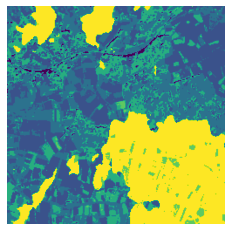

In [82]:
plt.imshow(scl[0])
plt.axis('off')
plt.show()

In [84]:
# all polygons are rasterised with a given label. Use this to customise your sampling given land cover and crop-type information.

polys = get_npy(sample, 'mask_timeless/ALL_POLYS')

polys.shape, polys.dtype, polys.max(), polys.min()

((2000, 2000, 1), dtype('uint16'), 7000, 0)

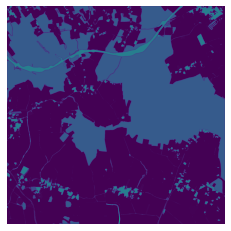

In [88]:
plt.imshow(polys)
plt.axis('off')
plt.show()

In [89]:
#  this mask is the target output used in training and testing of your method

target = get_npy(sample, 'mask_timeless/CULTIVATED')

target.shape, target.dtype, target.max(), target.min()

((2000, 2000, 1), dtype('bool'), True, False)

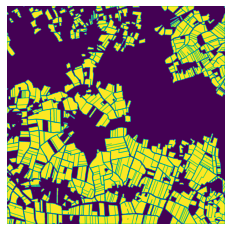

In [90]:
plt.imshow(target)
plt.axis('off')
plt.show()

In [91]:
#  this mask marks pixels that are ignored in the calculation of the validation metrics

not_declared = get_npy(sample, 'mask_timeless/NOT_DECLARED')

not_declared.shape, not_declared.dtype, not_declared.max(), not_declared.min()

((2000, 2000, 1), dtype('bool'), True, False)

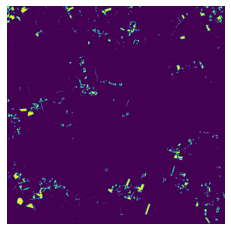

In [92]:
plt.imshow(not_declared)
plt.axis('off')
plt.show()

In [104]:
norm_factores = get_npy(sample, 'scalar/NORM_FACTORS')

norm_factores.shape, norm_factores.dtype, norm_factores.max(), norm_factores.min()

((38, 1), dtype('float32'), 1e-04, 1e-04)